# Orientation and Phase Mapping with `py4DSTEM.process.diffraction`

### Acknowledgements

This tutorial was created by the py4DSTEM instructor team:
- Colin Ophus (cophus@gmail.com)
- Yemi Uthman (authman@stanford.edu)

### Data Availability

Tutorial files:
- [Ti550_005_downsampled.h5 dataset](https://drive.google.com/file/d/1ASIrVm4DOr_S_UkTq-t-a8xKZVK3Y4qx/view)
- [Ti alpha phase cif](https://drive.google.com/file/d/1fCdjtZ_hsjAqRvLTr4rAnEwRSRBh4W5_/view)
- [Ti beta phase cif](https://drive.google.com/file/d/1rSNfab0NuO8ZlONFw1tU8lmXUZudFAc-/view)


The dataset used for this tutorial is taken from this manuscript:
- https://doi.org/10.1111/jmi.13275

The original data files can be be found here:
- https://doi.org/10.5525/gla.researchdata.1514

Note that for the purposes of this tutorial, the data has been binned in Fourier space by a factor of 4. We have also substantially lowered the accuracy of the orientation mapping in order for this notebook tutorial to run quickly.

### Notebook contents

- Load PED 4D-STEM data
- Detects all Bragg peaks for each probe position
- Calibrates the origin for each probe position
- Performs orientation mapping for alpha and beta Ti.
- Generates a phase map showing where the sample has alpha and beta structure.

import py4DSTEM

In [1]:
import numpy as np


import py4DSTEM as p4
import numpy as np
import os
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

%matplotlib inline
print(p4.__version__)


cupyx.jit.rawkernel is experimental. The interface can change in the future.


0.14.18


In [2]:
import copy 

## Download the 4DSTEM Dataset and Vacuum Probe Image
#### You can change the file destination to organize your Google Drive how you wish.

#### Firstly, you'll want to load in the 3 analysis files from their respective locations in google drive.

#### Ti550: https://drive.google.com/uc?id=1ASIrVm4DOr_S_UkTq-t-a8xKZVK3Y4qx

Filename: Ti550_005_downsampled.h5

#### Ti_HCP: https://drive.google.com/uc?id=1fCdjtZ_hsjAqRvLTr4rAnEwRSRBh4W5_

Filename: Ti_hcp.cif

#### Ti_BCC: https://drive.google.com/uc?id=1rSNfab0NuO8ZlONFw1tU8lmXUZudFAc-

Filename: 'Ti_bcc.cif'

In this section, you will be introduced to loading and analyzing data using the py4DSTEM library, Use the following functions to download and read the .cif files:

    p4.io.gdrive_download(...)
    p4.read(...)


In [3]:
# p4.io.gdrive_download(
#     id_ = 'https://drive.google.com/uc?id=1ASIrVm4DOr_S_UkTq-t-a8xKZVK3Y4qx',
#     destination = '/content/',
#     filename = 'Ti550_005_downsampled.h5',
#     overwrite=True,
# )
# p4.io.gdrive_download(
#     id_ = 'https://drive.google.com/uc?id=1fCdjtZ_hsjAqRvLTr4rAnEwRSRBh4W5_',
#     destination = '/content/',
#     filename = 'Ti_hcp.cif',
#     overwrite=True,
# )
# p4.io.gdrive_download(
#     id_ = 'https://drive.google.com/uc?id=1rSNfab0NuO8ZlONFw1tU8lmXUZudFAc-',
#     destination = '/content/',
#     filename = 'Ti_bcc.cif',
#     overwrite=True,
# )

In [4]:
path = 'C:\\_Data\\wendy_data\\'
file_data = path + 'al_alo_2_03_master.h5'
probe_path = path + 'al_alo_2_12_master.h5'
pt = path + 'pt_02_master.h5'

# Load data, basic visualization

First we import the 4D-STEM dataset.  Next we will calculate and display mean and max diffraction patterns, and virtual bright and dark field images. To do this, we must first read in the file of interest:
    
    dataset = p4.read(...)

Next, we will want to perform the calibration. We will use an inverse angle of 0.003629 mrad$^{-1}$ and a probe angle of 30 mrad to manually calculate the pixel size. We will utilize the following functions:

    dataset.calibration.set_Q_pixel_size(...)
    dataset.calibration.set_Q_pixel_units(...)
    dataset.calibration.set_R_pixel_size(...)
    dataset.calibration.set_R_pixel_units(...)

After calibrating, we can then visualize the diffraction pattern of interest. You can use these functions to do so:

    dataset.get_dp_max()
    dataset.get_dp_mean()

The mean and max diffraction patterns are saved into the "tree" method in the dataset class. You can also access individual diffraction patterns of each pixel in the 2D image using the "data" method. This will be useful throughout this notebook and the homework, as you will be required to save data into the tree by defining a 'name' within the tree method which you can then access later on:

    dataset.tree(...)
    dataset.data[...]

Lastly, you will want to plot your results using the function:

    p4.show(...)

In [5]:
# pt_data = p4.import_file(pt)



In [6]:
# pt_data.calibration

In [7]:
dataset = p4.import_file(file_data)

Dataset is uint32 but will be converted to uint16


In [8]:
# dataset.calibration

In [9]:
probe = p4.import_file(probe_path)
# probe.calibration

Dataset is uint32 but will be converted to uint16


In [10]:
# probe_original = copy.deepcopy(probe)
# dataset_original = copy.deepcopy(dataset)
# pt_original = copy.deepcopy(pt_data)

In [11]:
# Here we show how to manually apply the pixel size calibrations

# pixel_size_inv_Ang = 0.003629 * 8
# probe_step_size_Ang = 30

# # Diffraction space
# dataset.calibration.set_Q_pixel_size(pixel_size_inv_Ang)
# dataset.calibration.set_Q_pixel_units('A^-1')

# # Real space
# dataset.calibration.set_R_pixel_size(probe_step_size_Ang)
# dataset.calibration.set_R_pixel_units('A')

In [12]:
# We can easily check the dataset size and calibrations:
# dataset

In [13]:
# Mean and max diffraciton patterns, which will be stored as entries in dataset.tree()
dataset.get_dp_max();
dataset.get_dp_mean();
# dataset_original.get_dp_max();
# dataset_original.get_dp_mean();

probe.get_dp_max();
probe.get_dp_mean();
# probe_original.get_dp_max();
# probe_original.get_dp_mean();

# pt_data.get_dp_max();
# pt_data.get_dp_mean();
# pt_original.get_dp_max();
# pt_original.get_dp_mean();


In [14]:
dataset_masked = []
for data in [dataset,probe,]:#pt_data]:
    mask_hotpixel = data.tree('dp_mean').data>100
    masked = data.median_filter_masked_pixels(mask = mask_hotpixel, kernel_width = 5)
    masked.get_dp_max();
    masked.get_dp_mean();
    # Plot the hot pixel mask
    # p4.show(
    #     mask_hotpixel,
    #     cmap='gray',
    #     figsize=(4,4),
    #     ticks=False,
    #     title='Hot Pixel Mask (white = masked)',
    # )
    dataset_masked.append(masked)
dataset_masked, probe_masked = dataset_masked

---
## Creating a Synthetic Probe and Plotting Virtual Images

In this section, we simulate a synthetic electron probe and visualize the corresponding virtual images.

We begin by estimating the probe parameters, specifically the **convergence angle** and the **center position** in reciprocal space, using:

```
semiangle, x0, y0 = dataset.get_probe_size(...)
```

You can experiment with different synthetic probe geometries by specifying parameters in:

```
dataset.position_detector(...)
```

Once the synthetic probe is defined, we can simulate a virtual STEM image based on the specified detector configuration:

```
dataset.get_virtual_image(...)
```

This virtual image represents the expected signal if we were to integrate over the defined detector region — useful for ADF, BF, or custom detector shapes.

---

Probe Center = (101.72719204575263, 93.5080013466016) pixels 
Probe Radius = 66.007 pixels


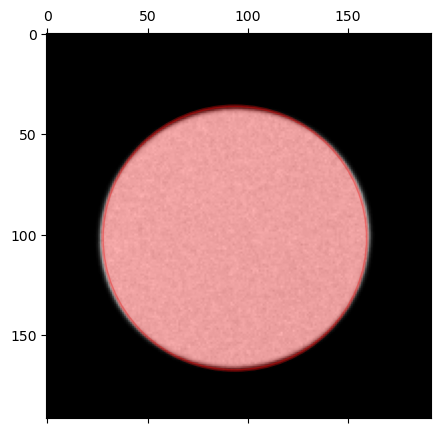

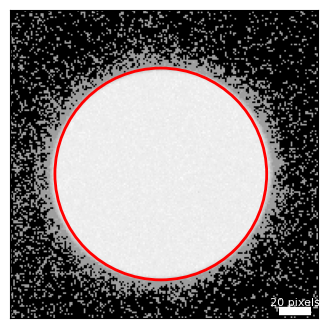

In [15]:
# Estimate the position of the zero beam

# Estimate the radius of the BF disk, and the center coordinates
probe_semiangle, probe_qx0, probe_qy0 = probe_masked.get_probe_size(
    thresh_lower=0.000000001,
    thresh_upper=0.6,
    plot=True,
    
)
center = (probe_qx0, probe_qy0)

# plot the mean diffraction pattern, with the estimated probe radius overlaid as a circle
print(f"Probe Center = {center} pixels ")
print(f"Probe Radius = {np.round(probe_semiangle, 3)} pixels")
p4.show(
    probe_masked.tree('dp_max'),
    figsize=(4,4),
    circle = {
        'center': center,
        'R': probe_semiangle,
    },
    ticks = False,
    returnfig = True,
    vmax = 10,
    power = 0.15,
)
plt.show()

## Calibrations

In [16]:
probe_masked.calibration

Calibration( A Metadata instance called 'calibration', containing the following fields:

             Q_pixel_size:      1
             R_pixel_size:      0.34555085515441486
             Q_pixel_units:     pixels
             R_pixel_units:     A
             QR_flip:           False
             probe_semiangle:   66.00694500901588
             qx0_mean:          101.72719204575263
             qy0_mean:          93.5080013466016
)

In [17]:
r_pixel_size = probe_masked.calibration['R_pixel_size']

print(f"Real space pixel size: {r_pixel_size} A")

Real space pixel size: 0.34555085515441486 A


In [19]:
# Here we show how to manually apply the pixel size calibrations
probe_step_size_Ang = 30
probe_pixel_number = probe_semiangle

Q_pixel_size = probe_step_size_Ang / probe_pixel_number

# Diffraction space
for data in [dataset, probe_masked,]:# pt_data]:
    data.calibration.set_Q_pixel_size(Q_pixel_size)
    data.calibration.set_Q_pixel_units('mrad')
    data.calibration.set_R_pixel_size(r_pixel_size)
    data.calibration.set_R_pixel_units('A')
    
    data.get_dp_max();
    data.get_dp_mean();





Probe Center = (101.72719204575263, 93.5080013466016) A^-1 
Probe Radius = 30.000024993271897 mrad


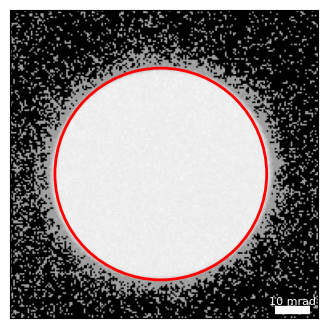

In [20]:
# Estimate the position of the zero beam

# Estimate the radius of the BF disk, and the center coordinates


# plot the mean diffraction pattern, with the estimated probe radius overlaid as a circle
print(f"Probe Center = {center} A^-1 ")
print(f"Probe Radius = {np.round(probe_semiangle, 3)*Q_pixel_size} mrad")
p4.show(
    probe.tree('dp_max'),
    figsize=(4,4),
    circle = {
        'center': center,
        'R': probe_semiangle,
    },
    ticks = False,
    returnfig = True,
    vmax = 10,
    power = 0.15,
)
plt.show()

## Defining Detector Radii for BF and ADF Imaging

Next, we define the detector geometries for our diffraction measurement. Specifically, we’ll set up a **Bright Field (BF)** and an **Annular Dark Field (ADF)** detector for the example pattern shown above.

These detectors are defined in terms of **pixel radii** in the virtual diffraction image, so it’s important to consider how this relates to the **calibrated size of the probe** in reciprocal space.

- The **BF detector** should include the unscattered and low-angle scattered electrons, typically covering the central region of the probe.
- The **ADF detector** captures higher-angle scattered electrons and is defined as an annular region surrounding the BF area.

Think about the convergence angle of your probe and how many pixels wide the probe disk appears. What might be a good size and geometry to use in that case and how does that change for the detector being used?

These values can be adjusted after inspecting the probe shape and mean diffraction pattern.

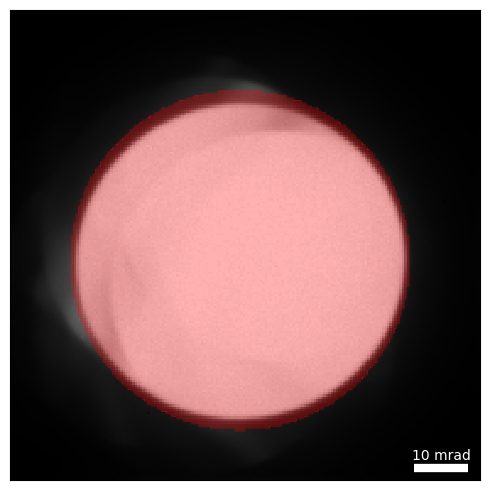

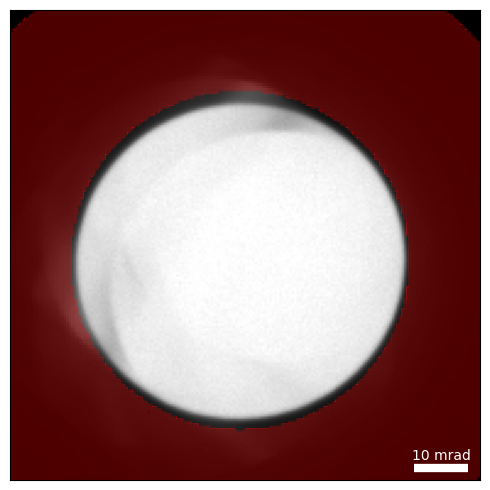

In [21]:
# Choose the radii for some virtual detectors
radius_BF = probe_pixel_number*1.05
radii_ADF = (probe_pixel_number*1.05, probe_pixel_number*2)

# Plot the detectors
dataset.position_detector(
    mode = 'circular',
    geometry = (
        center,
        radius_BF,
    ),
    ticks = False,
)
dataset.position_detector(
    mode = 'annular',
    geometry = (
        center,
        radii_ADF,
    ),
    ticks = False,
)

Within the `dataset.get_virtual_image` method, you can define a name for the image, which can then be accessed later by using the `.tree` method as described above.

In [22]:
# Calculate the virtual images
dataset.get_virtual_image(
    mode = 'circular',
    geometry = ((center), radius_BF),
    name = 'bright_field',
);

dataset.get_virtual_image(
    mode = 'annular',
    geometry = ((center), radii_ADF),
    name = 'dark_field',
);

100%|██████████| 65536/65536 [00:03<00:00, 19732.51it/s]


Can you describe what we are seeing in the images below? Why are we seeing these streaks going across the images? How do you think this would change using a different probe size or detector geometry?

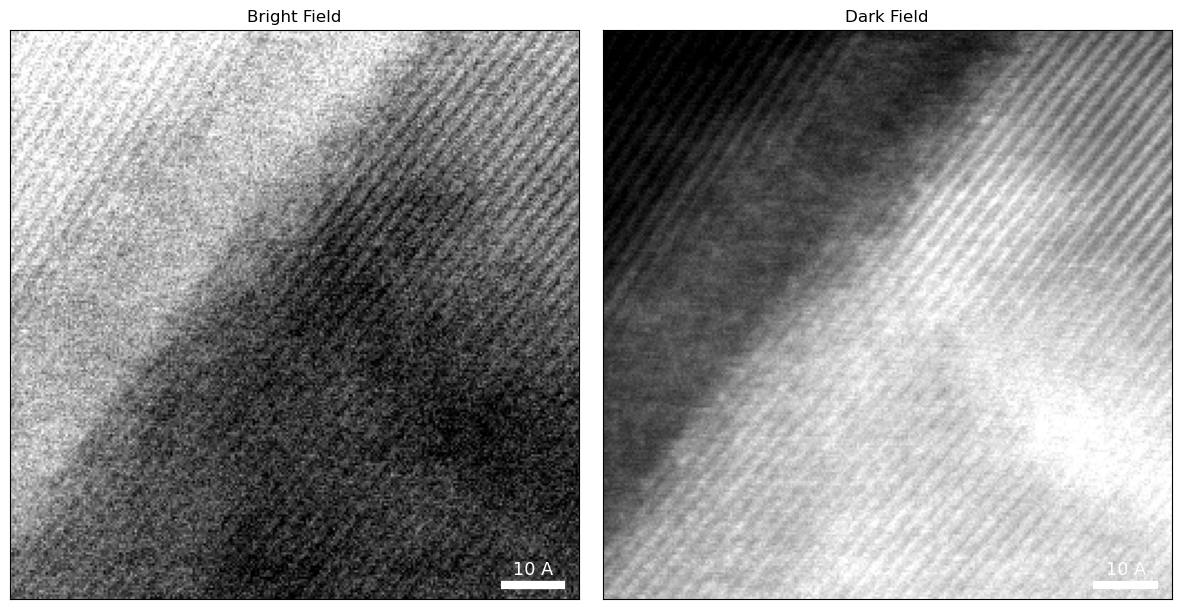

In [23]:
# Plot the virtual images
p4.show(
    [
        dataset.tree('bright_field'),
        dataset.tree('dark_field'),
    ],
    ticks = False,
    title = ['Bright Field', 'Dark Field'],
)
plt.show()

You can also sample individual diffraction patterns from the virtual image by defining pixels of interest in real space. Use the function `p4.visualize.show_points(...)` to show the points in real space that you wish to visualize the diffraction pattern for.

In [24]:
# Choose some diffraction patterns to use for parameter tuning

# rx = 30,30,30,30,30,30
# ry = 20,40,70,90,110,160
# colors=['r','r','r','r','r','r']

# p4.visualize.show_points(
#     dataset.tree('dark_field'),
#     x = rx,
#     y = ry,
#     pointcolor = colors,
#     figsize = (10,8),
#     ticks = False,
# )

In [25]:
ptycho1 = p4.process.phase.SingleslicePtychography(
    datacube=dataset_masked, #py4DSTEM DataCube
    energy=80e3, # energy in eV
    defocus=0, # defocus guess in A
    vacuum_probe_intensity=probe_masked.data, # vacuum probe measurement array
    device='gpu',#'gpu', # uncomment if you have access to a GPU
    storage='gpu', # uncomment if you have access to a GPU
)


In [28]:
del ptycho1

In [26]:
ptycho = ptycho1.preprocess(
    plot_center_of_mass = False,
    plot_rotation=False,
    plot_probe_overlaps=False,
)

Using synchronous transfer as pinned memory (9663676416 bytes) could not be allocated. This generally occurs because of insufficient host memory. The original error was: cudaErrorMemoryAllocation: out of memory


CUDADriverError: CUDA_ERROR_ILLEGAL_ADDRESS: an illegal memory access was encountered

---
# Bragg disk detection

To define our probe, we will use the following fuctions:

    p4.Probe.get_probe_kernel_edge_sigmoid(...)
    p4.Probe.generate_synthetic_probe(...)

The first function defines the edge shape of the synthetic probe. In this case, we are estimating the edge of the probe as a sigmoid function, which obeys the relationship:

$ σ = \frac{1}{1 + e^{-x}} $

With a designated inner and outer radius of r1 and r2. **Why do you think this is a fair estimate for the shape of the probe?**

The second function generates the synthetic probe with a defined probe radius and probe width, as well as the shape of the entire reciprocal space image (64 x 64).

Fill in the `probe_radius`, `probe_width`,  `r1`, and `r2` variables with the values you used in the cell above.

In [106]:
def update_plot(probe_radius: int, probe_width: int, r1: int, r2: int) -> None:
    '''
    Update the plot with the new radius and width values.

    Parameters
    ----------
    radius : int
        The radius of the probe kernel.
    width : int
        The width of the probe kernel.
    r1 : int
        The inner radius of the annular dark field detector.
    r2 : int
        The outer radius of the annular dark field detector.

    Returns
    ----------
    None
    '''
    probe_kernel = p4.Probe.get_probe_kernel_edge_sigmoid(
        p4.Probe.generate_synthetic_probe(
            probe_radius,
            probe_width,
            dataset.Qshape,
        ),
        radii=(r1, r2),
    )

    plt.clf()
    p4.visualize.show_kernel(
        probe_kernel,
        R=10,
        L=10,
        W=1,
        figsize=(6, 4),
    )

radius_slider = widgets.FloatSlider(
    value=1.5, min=0.5, max=3.0, step=0.1, description="Radius:"
)
width_slider = widgets.FloatSlider(
    value=1.5, min=0.5, max=3.0, step=0.1, description="Width:"
)
r1_slider = widgets.FloatSlider(
    value=2, min=0, max=10.0, step=1, description="r1:"
)
r2_slider = widgets.FloatSlider(
    value=4, min=0, max=10.0, step=1, description="r2:"
)

In [29]:
widgets.interact(
                update_plot,
                probe_radius=radius_slider,
                probe_width=width_slider,
                r1=r1_slider,
                r2=r2_slider)

plt.show()

interactive(children=(FloatSlider(value=1.5, description='Radius:', max=3.0, min=0.5), FloatSlider(value=1.5, …

In [30]:
probe_radius = 1.5
probe_width = 1.5
r1 = 2
r2 = 4

probe_kernel = p4.Probe.get_probe_kernel_edge_sigmoid(
        p4.Probe.generate_synthetic_probe(
            probe_radius,
            probe_width,
            dataset.Qshape,
        ),
        radii=(r1, r2),
    )

Here, were using the six sample positions in real space (the rx, ry defined above) and visualizing the diffraction patterns for each of those pixels. We are interested in seeing if we can detect the bragg peaks (positions where we expect to see diffraction from the real space positions).

Play around with each of the following hyperparameters to see how best you can detect the bragg peaks

(*Hint: There may be only 1 or 2 hyperparameters that make a significant difference here*)

In [31]:
dataset.find_Bragg_disks?

Signature:
dataset.find_Bragg_disks(
    template,
    data=None,
    radial_bksb=False,
    filter_function=None,
    corrPower=1,
    sigma=None,
    sigma_dp=0,
    sigma_cc=2,
    subpixel='multicorr',
    upsample_factor=16,
    minAbsoluteIntensity=0,
    minRelativeIntensity=0.005,
    relativeToPeak=0,
    minPeakSpacing=60,
    edgeBoundary=20,
    maxNumPeaks=70,
    CUDA=False,
    CUDA_batched=True,
    distributed=None,
    ML=False,
    ml_model_path=None,
    ml_num_attempts=1,
    ml_batch_size=8,
    name='braggvectors',
    returncalc=True,
)
Docstring:
Finds the Bragg disks in the diffraction patterns represented by `data` by
cross/phase correlatin with `template`.

Behavior depends on `data`. If it is None (default), runs on the whole DataCube,
and stores the output in its tree. Otherwise, nothing is stored in tree,
but some value is returned. Valid entries are:

    - a 2-tuple of numbers (rx,ry): run on this diffraction image,
        and return a QPoints instance

In [32]:
# Test hyperparameters on a few probe positions
# Visualize the diffraction patterns and the located disk positions

def update_plot(corrPower, sigma, edgeBoundary, minRelativeIntensity, minAbsoluteIntensity, minPeakSpacing):
    detect_params = {
        'corrPower': corrPower,
        'sigma': sigma,
        'edgeBoundary': edgeBoundary,
        'minRelativeIntensity': minRelativeIntensity,
        'minAbsoluteIntensity': minAbsoluteIntensity,
        'minPeakSpacing': minPeakSpacing,
        # 'subpixel' : 'multicorr',
        # 'upsample_factor': 8,
        'subpixel': 'poly',
        'maxNumPeaks': 500,
    }

    disks_selected = dataset.find_Bragg_disks(
        template=probe_kernel,
        data=(rx, ry),
        **detect_params,
    )

    p4.visualize.show_image_grid(
        get_ar=lambda i: dataset.data[rx[i], ry[i], :, :],
        H=2,
        W=3,
        axsize=(4, 4),

        get_bordercolor=lambda i: colors[i],
        get_x=lambda i: disks_selected[i].data['qx'],
        get_y=lambda i: disks_selected[i].data['qy'],
        get_pointcolors=lambda i: colors[i],
        open_circles=True,
        scale=500,

        power=0.5,
        vmin=0.0,
        vmax=0.95,
        cmap='Greys',
    )


corrPower_slider = widgets.FloatSlider(value=1, min=0, max=2, step=0.1, description="corrPower:")
sigma_slider = widgets.FloatSlider(value=0, min=0, max=5, step=0.1, description="sigma:")
edgeBoundary_slider = widgets.IntSlider(value=1, min=0, max=10, step=1, description="edgeBoundary:")
minRelativeIntensity_slider = widgets.FloatSlider(value=0, min=0, max=1, step=0.1, description="minRelativeIntensity:")
minAbsoluteIntensity_slider = widgets.FloatSlider(value=12.0, min=0, max=100, step=1, description="minAbsoluteIntensity:")
minPeakSpacing_slider = widgets.IntSlider(value=4, min=0, max=20, step=1, description="minPeakSpacing:")

widgets.interact(
    update_plot,
    corrPower=corrPower_slider,
    sigma=sigma_slider,
    edgeBoundary=edgeBoundary_slider,
    minRelativeIntensity=minRelativeIntensity_slider,
    minAbsoluteIntensity=minAbsoluteIntensity_slider,
    minPeakSpacing=minPeakSpacing_slider,
)

plt.show()

interactive(children=(FloatSlider(value=1.0, description='corrPower:', max=2.0), FloatSlider(value=0.0, descri…

Fill in the `detect_params` dictionary with the values you determined above. Perform the peak detection for all points in the image and save them using:

    p4.save(...)

In [33]:
# Find Bragg peaks in all probe positions.
# Here we use "poly" which is less accurate for the subpixel Bragg peak positions, but much faster!

# Hyperparameters
detect_params = {
    'corrPower': 1,
    'sigma': 0,
    'edgeBoundary': 1,
    'minRelativeIntensity': 0,
    'minAbsoluteIntensity': 12.0,
    'minPeakSpacing': 4,
    'subpixel' : 'poly',
    'maxNumPeaks': 500,
}

bragg_peaks = dataset.find_Bragg_disks(
    template = probe_kernel,
    **detect_params,
)

Finding Bragg Disks:  56%|█████▌    | 36.6k/65.5k [00:53<00:42, 683DP/s]


KeyboardInterrupt: 

In [ ]:
# Save disk positons
file_braggdisks_raw = file_analysis + 'braggdisks_raw.h5'
p4.save(
    file_braggdisks_raw,
    bragg_peaks,
    mode='o',
)

100%|██████████| 19100/19100 [00:04<00:00, 4162.86it/s]


# Reload the data into the current runtime if necessary

In [ ]:
# Reload Bragg peaks if needed
file_braggdisks_raw = file_analysis + 'braggdisks_raw.h5'
p4.print_h5_tree(file_braggdisks_raw)

In [ ]:
# Uncomment to load the bragg peaks at this stage
bragg_peaks = p4.read(
    file_braggdisks_raw,
)
bragg_peaks

BraggVectors( A (100, 191)-shaped array of lists of bragg vectors )

# Calibrations
---

## Centering the Bragg Patterns

We first measure the center of each diffraction pattern using the `measure_origin` function. This helps identify the **zero beam position**, which often drifts during a 4D-STEM scan due to mechanical instabilities or scan distortions.

```python
origin_meas = bragg_peaks.measure_origin(
    center_guess = center,
    score_method = 'intensity',
)
```

- `center_guess` provides an initial estimate of the beam center.
- `score_method = 'intensity'` searches for the brightest pixel in the diffraction pattern, assuming the zero-order beam is the brightest. This is often the most reliable method for locating the center in typical datasets.
- Alternatively, `score_method = 'distance'` would minimize the displacement from the initial guess, but this is less robust for noisy data.

We can then fit a smooth 2D plane to the origin shifts using the `fit_origin` function:

```
qx0_fit, qy0_fit, qx0_residuals, qy0_residuals = bragg_peaks.fit_origin(
    robust = True,
    ...
)
```

- This models the origin shifts across the scan as a smooth trend (e.g., caused by beam drift or scan coil distortion).
- `robust=True` ensures that outliers do not skew the fit.


In [ ]:
bragg_peaks.fit_origin?

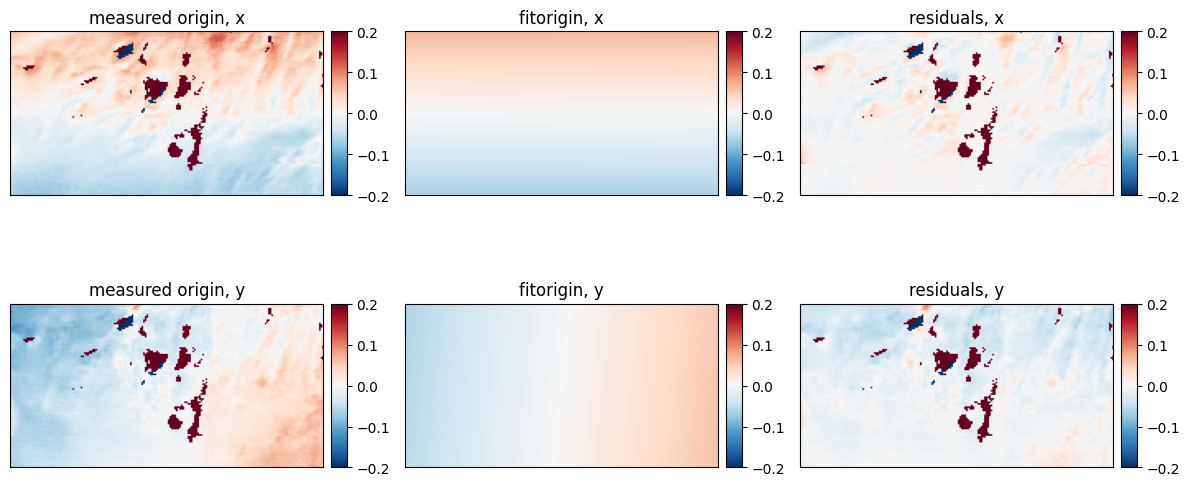

In [ ]:
# Measure the origin position. Note the "intensity" method works well here as the zero beam is usually the brightest peak in this dataset.

origin_meas = bragg_peaks.measure_origin(
    center_guess = center,
    # score_method = 'distance',
    score_method = 'intensity',
)

# fit a 2D plane to the origin shifts (descan)
qx0_fit,qy0_fit,qx0_residuals,qy0_residuals = bragg_peaks.fit_origin(
    robust = True,
    plot_range = 0.2,
    ticks = False,
    axsize = (4,4),
)

# note that we're plotting +/-0.2 pixels, so there is not much de-scan in the data!

## Ellipticity

Ellipticity accounts for distortions in the diffraction pattern that stretch it into an ellipse (rather than a circle). These can come from microscope lens aberrations or detector tilt.

```
bragg_peaks.calibration.set_ellipse((1,1,0))
```

`(1,1,0)` means no ellipticity correction is applied (if the pattern is already circular)

In [ ]:
bragg_peaks.calibration.set_ellipse((1,1,0))

## Rotation

We ensure that the diffraction data is oriented correctly — meaning the **q<sub>x</sub> and q<sub>y</sub>** axes are aligned and not flipped or rotated.

```
bragg_peaks.calibration.set_QR_rotation_degrees(0)
bragg_peaks.calibration.set_QR_flip(False)
```

Rotation is set to 0°, and no flipping is applied — assuming the dataset is already in the correct orientation.

In [ ]:
bragg_peaks.calibration.set_QR_rotation_degrees(0)
bragg_peaks.calibration.set_QR_flip(False)

# Pixel size

Calibrate data assuming most of the pixels are alpha phase Titanium (hcp).

In [ ]:
# initial guess for pixel size
inv_Ang_per_pixel = 0.039

bragg_peaks.calibration.set_Q_pixel_size(inv_Ang_per_pixel)
bragg_peaks.calibration.set_Q_pixel_units('A^-1')
bragg_peaks.calibrate()

In [ ]:
crystal = p4.process.diffraction.Crystal.from_CIF(cif_Ti_alpha)

get_structures is deprecated; use parse_structures in pymatgen.io.cif instead.
The only difference is that primitive defaults to False in the new parse_structures method.So parse_structures(primitive=True) is equivalent to the old behavior of get_structures().
Issues encountered while parsing CIF: 2 fractional coordinates rounded to ideal values to avoid issues with finite precision.


## Compare Measured Diffraction Pattern with Reference Crystal Structures

Compute and visualize the **expected Bragg peak positions and intensities** based on the known crystal structure, then compare them to the experimental diffraction pattern.

We first define a spatial frequency cutoff `k_max` and we use the following function to compute the structure factors up to that frequency:

```
crystal.calculate_structure_factors(k_max)
```

This determines which Bragg peaks should appear within the selected range of reciprocal space.

Next, we overlay the reference diffraction pattern (from the structure factors) with the experimental data to validate peak positions and relative intensities:

```
plot_params = {
    'bragg_peaks',
    'k_power_scale',
    'k_broadening',
    'bragg_k_power',
    'bragg_k_broadening',
    'k_min',
}
```
We then use the `crystal.plot_scattering_intensity()` function to plot the calculated intensities

- The **black lines** show measured Bragg peak intensities.
- The **red curve** represents the simulated scattering from the reference crystal.

In [ ]:
# Calculate structure factors
k_max = 1.6
crystal.calculate_structure_factors(k_max)

In [ ]:
def interactive_bragg_plot(k_power_scale=0.0, k_broadening=0.001, bragg_k_power=2.0, bragg_k_broadening=0.005, k_min=0.3, k_max=1.6):
    plot_params = {
        'bragg_peaks': bragg_peaks,
        'k_power_scale': k_power_scale,
        'k_broadening': k_broadening,
        'bragg_k_power': bragg_k_power,
        'bragg_k_broadening': bragg_k_broadening,
        'k_min': k_min,
        'k_max': k_max,
        'figsize': (8, 3),
    }
    crystal.plot_scattering_intensity(**plot_params)

widgets.interact(
    interactive_bragg_plot,
    k_power_scale=widgets.FloatSlider(min=0.0, max=2.0, step=0.1, value=0.0),
    k_broadening=widgets.FloatLogSlider(min=-4, max=-1, step=0.1, value=0.001, description='k_broadening'),
    bragg_k_power=widgets.FloatSlider(min=0.0, max=5.0, step=0.1, value=2.0),
    bragg_k_broadening=widgets.FloatLogSlider(min=-4, max=-1, step=0.1, value=0.005, description='bragg_k_broadening'),
    k_min=widgets.FloatSlider(min=0.1, max=1.0, step=0.05, value=0.3),
    k_max=widgets.FloatSlider(min=0.5, max=2.0, step=0.1, value=1.6),)


interactive(children=(FloatSlider(value=0.0, description='k_power_scale', max=2.0), FloatLogSlider(value=0.001…

<function __main__.interactive_bragg_plot(k_power_scale=0.0, k_broadening=0.001, bragg_k_power=2.0, bragg_k_broadening=0.005, k_min=0.3, k_max=1.6)>

In [ ]:
crystal.calibrate_pixel_size?

Calibrated pixel size = 0.03869519 A^-1


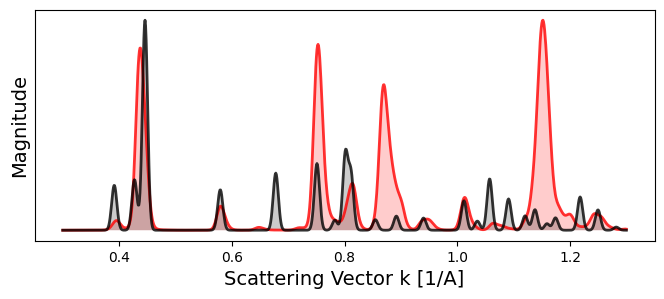

In [ ]:
# Fill in the bragg_peaks_calibrated variable with the best fit values identified above

bragg_peaks_calibrated = crystal.calibrate_pixel_size(
    bragg_peaks = bragg_peaks,
    bragg_k_power = 2.0,
    k_min = 0.3,
    k_max = 1.3,
    k_step = 0.001,
    k_broadening = 0.002,
    plot_result = True,
    fit_all_intensities = False,
    figsize = (8,3),
)

In [ ]:
# Save calibrated disk positions
file_braggdisks_cali = file_analysis + 'braggdisks_calibrated.h5'
p4.save(
    file_braggdisks_cali,
    bragg_peaks_calibrated,
    mode='o',
)

100%|██████████| 19100/19100 [00:04<00:00, 4019.39it/s]


# Orientation mapping

In [ ]:
# Reload Bragg peaks if needed
file_braggdisks_cali = file_analysis + 'braggdisks_calibrated.h5'
# file_braggdisks_cali =  '/Users/cophus/Library/CloudStorage/Dropbox/' + \
#     'PED_region02_0p4precession_orientation01_analysis_braggdisks_calibrated.h5'
p4.print_h5_tree(file_braggdisks_cali)

/
|---py4DSTEM_root
    |---braggvectors_copy
        |---_v_uncal




In [ ]:
# Uncomment to load the bragg peaks at this stage
bragg_peaks_calibrated = p4.read(
    file_braggdisks_cali,
)
bragg_peaks_calibrated

Reading PointListArray: 100%|██████████| 19100/19100 [00:06<00:00, 2821.13PointList/s]


BraggVectors( A (100, 191)-shaped array of lists of bragg vectors )

In [ ]:
bragg_peaks.calibration

Calibration( A Metadata instance called 'calibration', containing the following fields:

             Q_pixel_size:          0.039
             R_pixel_size:          30
             Q_pixel_units:         A^-1
             R_pixel_units:         A
             QR_flip:               False
             probe_semiangle:       1.3953261724898234
             qx0_mean:              31.003866054108798
             qy0_mean:              31.108946693586137
             qx0_meas:              2D-array
             qy0_meas:              2D-array
             origin_meas_mask:      2D-array
             qx0:                   2D-array
             qx0_shift:             2D-array
             qy0:                   2D-array
             qy0_shift:             2D-array
             a:                     1
             b:                     1
             theta:                 0
             QR_rotation:           0.0
             QR_rotation_degrees:   0
)

In [ ]:
crystal_Ti_alpha = p4.process.diffraction.Crystal.from_CIF(cif_Ti_alpha)
crystal_Ti_beta = p4.process.diffraction.Crystal.from_CIF(cif_Ti_beta)

get_structures is deprecated; use parse_structures in pymatgen.io.cif instead.
The only difference is that primitive defaults to False in the new parse_structures method.So parse_structures(primitive=True) is equivalent to the old behavior of get_structures().
Issues encountered while parsing CIF: 2 fractional coordinates rounded to ideal values to avoid issues with finite precision.


# Orientation Mapping

In this section, we determine the local crystal orientation at each scan position by matching experimental Bragg peaks to simulated diffraction patterns.

---

We begin by computing orientation plans for both the α and β phases of Ti. This involves simulating diffraction patterns across a grid of possible crystal orientations. The angular sampling is coarsened to reduce runtime:

```python
acom_params = {**args}

crystal_Ti_alpha.orientation_plan(**acom_params)
crystal_Ti_beta.orientation_plan(**acom_params)
```

This generates a lookup table of simulated patterns that will later be compared to the experimental data.

We then test orientation matching at a specific scan position `(xind, yind)`:

```
orientation_Ti_alpha = crystal_Ti_alpha.match_single_pattern(...)
orientation_Ti_beta = crystal_Ti_beta.match_single_pattern(...)
```
Each match returns the **best-fit orientations** for that phase.

We request the **top 2 matches** and specify a minimum angular separation to ensure distinct solutions.


### Visualize Matched Patterns

For both the α and β phases, we simulate diffraction patterns based on the top 2 matched orientations, then overlay them with the experimental Bragg peaks for comparison with the function:

```
p4.process.diffraction.plot_diffraction_pattern(...)
```

**Red** = Ti α phase  
**Blue** = Ti β phase  

In [ ]:
# Calculate structure factors
k_max = 1.4  # reduced structure factor to speed up tutorial

crystal_Ti_alpha.calculate_structure_factors(k_max)
crystal_Ti_beta.calculate_structure_factors(k_max)

In [ ]:
crystal_Ti_alpha.orientation_plan?

In [ ]:
# Make orientation plans
# Note that we're doing a coarse search over 4 degree step sizes and only refining to 2 degrees.
# This is done to make the tutorial take much less time.

acom_params = {
    'zone_axis_range': 'auto',

    'angle_step_zone_axis': 2.5,
    'angle_coarse_zone_axis': 5.0,
    'angle_refine_range': 3.0,
    'angle_step_in_plane': 10.0,

    'accel_voltage': 200e3,
    'corr_kernel_size': 0.04,

    'power_intensity': 0.5,
    'power_intensity_experiment': 0.5,

    'sigma_excitation_error': 0.02,
    'precession_angle_degrees': 0.5,
}

crystal_Ti_alpha.orientation_plan(**acom_params)
crystal_Ti_beta.orientation_plan(**acom_params)

Automatically detected point group 6/mmm,
 using arguments: zone_axis_range = 
[[0.8660254 0.5       0.       ]
 [1.        0.        0.       ]], 
 fiber_axis=None, fiber_angles=None.


Orientation plan: 100%|██████████| 703/703 [00:00<00:00, 2789.60 zone axes/s]


Automatically detected point group m-3m,
 using arguments: zone_axis_range = 
[[0 1 1]
 [1 1 1]], 
 fiber_axis=None, fiber_angles=None.


Orientation plan: 100%|██████████| 276/276 [00:00<00:00, 3056.31 zone axes/s]


In [ ]:
crystal_Ti_alpha.match_single_pattern?

In [ ]:
crystal_Ti_alpha.generate_diffraction_pattern?

Best fit lattice directions: z axis = ([ 0.66  -0.321 -0.339  0.055]), x axis = ([ 0.447 -0.043 -0.403  0.384]), with corr value = 289.7
Best fit lattice directions: z axis = ([ 0.474 -0.054 -0.42   0.261]), x axis = ([ 0.644 -0.291 -0.353  0.056]), with corr value = 75.285
Best fit lattice directions: z axis = ([0.511 0.58  0.634]), x axis = ([0.15  0.666 0.731]), with corr value = 208.504
Best fit lattice directions: z axis = ([0.211 0.247 0.946]), x axis = ([0.298 0.399 0.867]), with corr value = 118.614


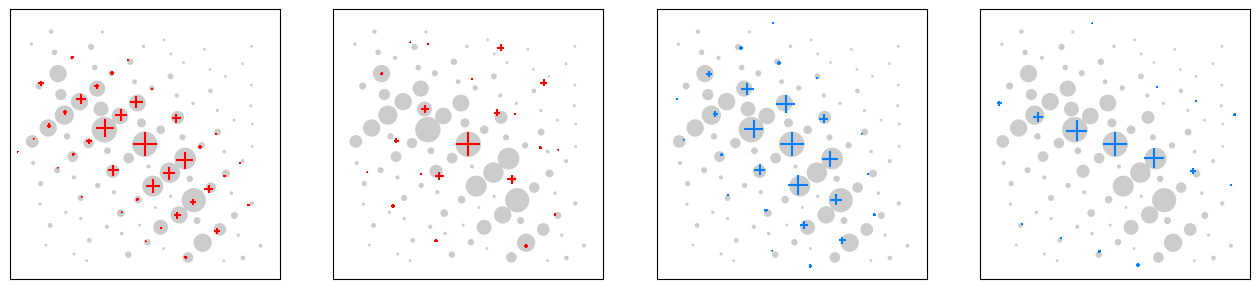

In [ ]:
# Test orientation_matching on some probe positions

xind, yind = 50,130
xind, yind = 50,150

min_angle_between_matches_deg = 30
precession_angle_degrees = 0.5
sigma_compare = 0.02
num_matches_return = 2


# Fit all crystals
orientation_Ti_alpha  = crystal_Ti_alpha.match_single_pattern(
    bragg_peaks_calibrated.cal[xind,yind],
    num_matches_return = num_matches_return,
    verbose = True,
    min_angle_between_matches_deg=min_angle_between_matches_deg,
)
orientation_Ti_beta  = crystal_Ti_beta.match_single_pattern(
    bragg_peaks_calibrated.cal[xind,yind],
    num_matches_return = num_matches_return,
    verbose = True,
    min_angle_between_matches_deg=min_angle_between_matches_deg,
)


# Generate test diffraction patterns for matches 0 and 1
bragg_peaks_fit_Ti_alpha_0 = crystal_Ti_alpha.generate_diffraction_pattern(
    orientation_Ti_alpha,
    ind_orientation=0,
    sigma_excitation_error=sigma_compare,
    precession_angle_degrees = precession_angle_degrees,
)
bragg_peaks_fit_Ti_alpha_1 = crystal_Ti_alpha.generate_diffraction_pattern(
    orientation_Ti_alpha,
    ind_orientation=1,
    sigma_excitation_error=sigma_compare,
    precession_angle_degrees = precession_angle_degrees,
)

bragg_peaks_fit_Ti_beta_0 = crystal_Ti_beta.generate_diffraction_pattern(
    orientation_Ti_beta,
    ind_orientation=0,
    sigma_excitation_error=sigma_compare,
    precession_angle_degrees = precession_angle_degrees,
)
bragg_peaks_fit_Ti_beta_1 = crystal_Ti_beta.generate_diffraction_pattern(
    orientation_Ti_beta,
    ind_orientation=1,
    sigma_excitation_error=sigma_compare,
    precession_angle_degrees = precession_angle_degrees,
)


# plotting frame
figsize = (4,4)
fig,ax = plt.subplots(1,4,figsize=(4*figsize[0],1*figsize[1]))

plot_params = {
    'bragg_peaks_compare':     bragg_peaks_calibrated.cal[xind,yind],
    # 'plot_range_kx_ky':  np.array([k_max,k_max]),
    'plot_range_kx_ky':  np.array([1.4,1.4]),
    'min_marker_size': 1,
    'max_marker_size': 300,
    'add_labels': False,

    'scale_markers': 8000,
    'scale_markers_compare': 0.02,
    'marker': '+',
    'facecolor_compare': (0.8,0.8,0.8),

    # 'color':(1,0,0),
    'edgecolor': None,
    # 'facecolor': 'none',
    'linewidth':1.5,
    'show_axes':False
}


# plot comparisons
# Ti alpha
p4.process.diffraction.plot_diffraction_pattern(
    bragg_peaks = bragg_peaks_fit_Ti_alpha_0,
    input_fig_handle=(fig,[ax[0]]),
    color = (1.0,0.0,0.0),
    **plot_params,
)
p4.process.diffraction.plot_diffraction_pattern(
    bragg_peaks = bragg_peaks_fit_Ti_alpha_1,
    input_fig_handle=(fig,[ax[1]]),
    color = (1.0,0.0,0.0),
    **plot_params,
)
# Ti beta
p4.process.diffraction.plot_diffraction_pattern(
    bragg_peaks = bragg_peaks_fit_Ti_beta_0,
    input_fig_handle=(fig,[ax[2]]),
    color = (0.0,0.5,1.0),
    **plot_params,
)
p4.process.diffraction.plot_diffraction_pattern(
    bragg_peaks = bragg_peaks_fit_Ti_beta_1,
    input_fig_handle=(fig,[ax[3]]),
    color = (0.0,0.5,1.0),
    **plot_params,
)

Lastly, we will use the `crystal_Ti_alpha.match_orientations()` function, which compares the simulated orientation plan (created earlier using orientation_plan) to the experimental Bragg peaks at every probe position in the 4D dataset. It systematically searches for the best-matching orientation for each pixel by minimizing some error function, such as the difference in Bragg peak positions or intensities.



In [ ]:
crystal_Ti_alpha.match_orientations?

In [ ]:
# Fit orientation to all probe positions
num_matches_return = 1
min_angle_between_matches_deg = 30

orientation_map_Ti_alpha = crystal_Ti_alpha.match_orientations(
    bragg_peaks_calibrated,
    num_matches_return = num_matches_return,
    min_angle_between_matches_deg = min_angle_between_matches_deg,
)

orientation_map_Ti_beta = crystal_Ti_beta.match_orientations(
    bragg_peaks_calibrated,
    num_matches_return = num_matches_return,
    min_angle_between_matches_deg = min_angle_between_matches_deg,
)

Matching Orientations: 100%|██████████| 19100/19100 [01:35<00:00, 200.30 PointList/s]


## Plot the Orientation Maps for Both Phases

    crystal_Ti_alpha.orientation_map(...)

In [ ]:
crystal_Ti_alpha.plot_orientation_maps?

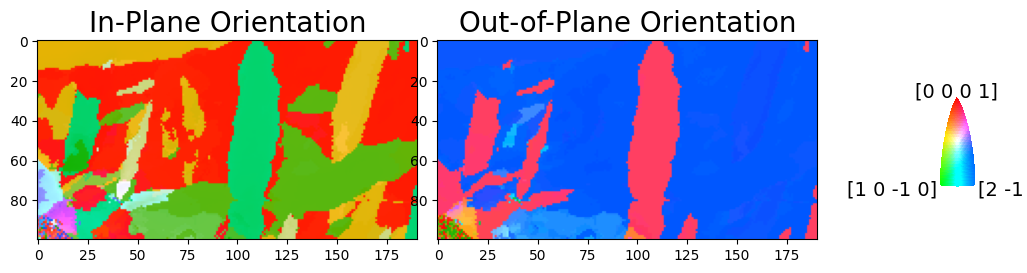

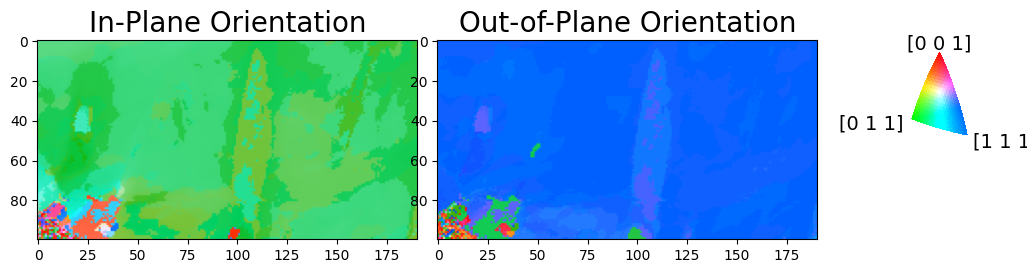

In [ ]:
c_r = (0,0.01)

im_alpha = crystal_Ti_alpha.plot_orientation_maps(
    orientation_map = crystal_Ti_alpha.orientation_map,
    corr_range = c_r,
    figsize = (10,4),
    show_legend = True,
    # camera_dist = 10,
);

im_beta = crystal_Ti_beta.plot_orientation_maps(
    orientation_map = crystal_Ti_beta.orientation_map,
    corr_range = c_r,
    figsize = (10,4),
    show_legend = True,
    # camera_dist = 10,
);

# Phase Mapping

Next, we will want to estimate the phase boundaries within the image.

- From the `crystal_Ti_alpha.match_orientations()` function above, we know that we will be calculating similarity scores for each probe position

- We can access the correlation scores by using `crystal_Ti_alpha/beta.orientation_map.corr`

If we want to create an alpha phase mapping of the sample, what technique could we use to do so?

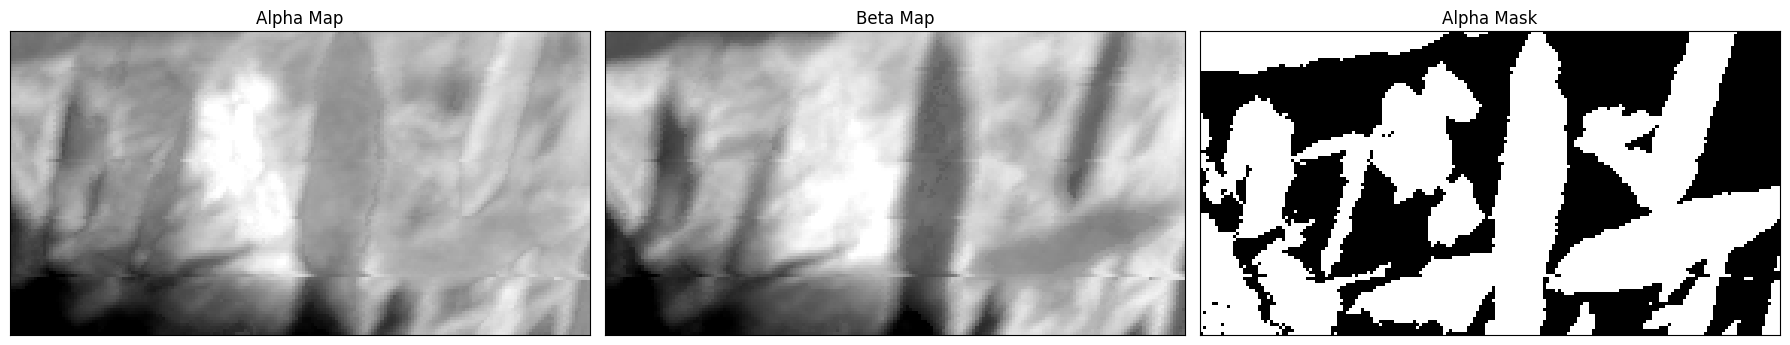

In [ ]:
# We can estimate the phase boundaries by comparing the correlation scores of the two orientation maps:
phase_alpha = crystal_Ti_alpha.orientation_map.corr[:,:,0] > crystal_Ti_beta.orientation_map.corr[:,:,0]

p4.show(
    [
        crystal_Ti_alpha.orientation_map.corr[:,:,0],
        crystal_Ti_beta.orientation_map.corr[:,:,0],
        phase_alpha,
    ],
    ticks = False,
    title = ['Alpha Map', 'Beta Map', 'Alpha Mask']
)


### We can even go one step further and calculate the percentage of the total image made up of each phase using:
    
    phase_map.quantify_single_pattern(...)

In [ ]:
phase_map = p4.process.diffraction.CrystalPhase(
    crystals = [
        crystal_Ti_alpha,
        crystal_Ti_beta,
    ],
    crystal_names = [
        'Ti_alpha',
        'Ti_beta',
    ],
)

phase_weight   or_ind   name
        0.00        0   Ti_alpha    
       32.68        0   Ti_beta     
----------------------------
       32.68       fit total
       39.32    fit residual


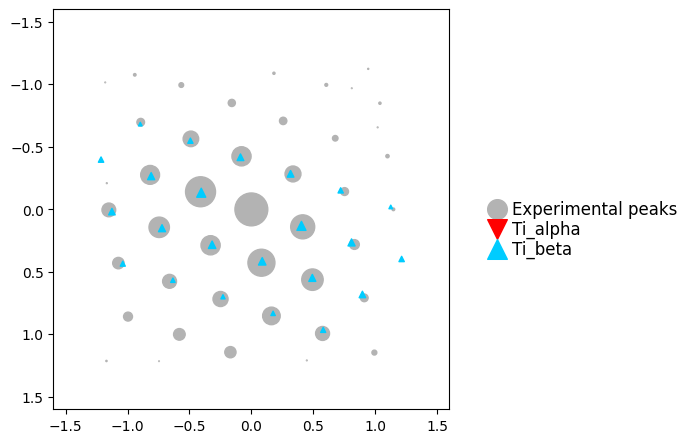

In [ ]:
phase_weights, phase_residual, phase_reliability, int_total = phase_map.quantify_single_pattern(
    bragg_peaks_calibrated,

    xy_position = (50,130),

    single_phase = True,
    max_number_patterns = 1,
    allow_strain = False,

    corr_kernel_size = 0.04,
    sigma_excitation_error = 0.01,
    precession_angle_degrees = 0.5,

    plot_unmatched_peaks = True,
    scale_markers_experiment = 0.02,
    scale_markers_calculated = 100,
    k_max = 1.6,
    figsize = (6,4),
)

In [ ]:
phase_map.quantify_phase(
    bragg_peaks_calibrated,

    single_phase = True,
    max_number_patterns = 1,
    allow_strain = True,

    corr_kernel_size = 0.04,
    sigma_excitation_error = 0.01,
    precession_angle_degrees = 0.5,

    k_max = 1.6,
)

Quantifying Phase: 100%|██████████| 19100/19100 [02:09<00:00, 147.61 PointList/s]


Phase Fractions
---------------
Ti_alpha - 54.9599%
Ti_beta - 45.0401%


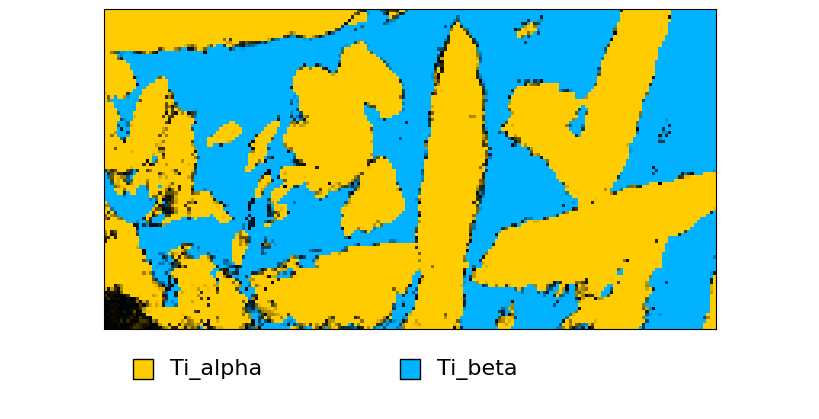

In [ ]:
mask_range = (0.0,1.0)


fig,ax = phase_map.plot_dominant_phase(
    reliability_range = mask_range,

    figsize = (8,4),
    sigma = 1,
    phase_colors = np.array([
        [1.0,0.8,0.0],
        [0.0,0.7,1.0],
    ]),

    ticks = False,
    print_fractions = True,
)

### We will also want to generate a masked image for each each phase. Using `np.clip` we will bound the values in the phase map array between 0 and 1.

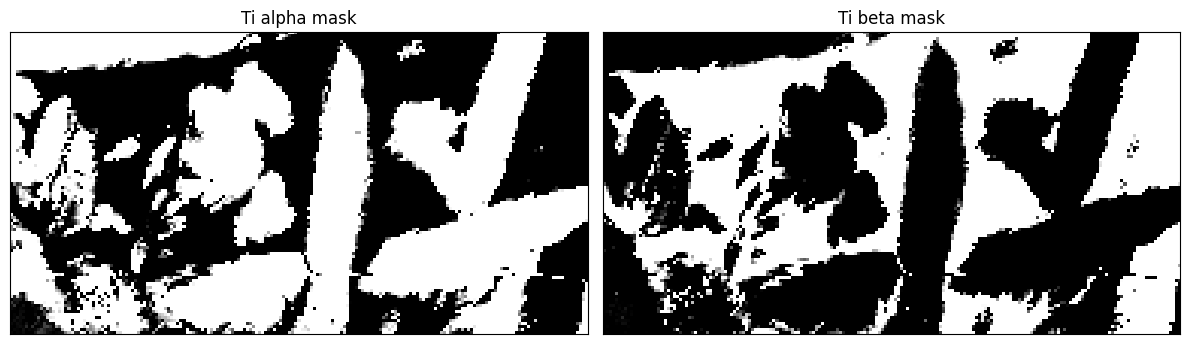

In [ ]:
# We can also generate mask images for each phase
mask = np.clip(
    (phase_map.phase_reliability - mask_range[0])
    / (mask_range[1] - mask_range[0]),0,1)
mask_alpha = mask * (phase_map.phase_weights[:,:,0] > phase_map.phase_weights[:,:,1])
mask_beta = mask * (phase_map.phase_weights[:,:,1] > phase_map.phase_weights[:,:,0])

p4.show(
    [
        mask_alpha,
        mask_beta,
    ],
    ticks = False,
    title = ['Ti alpha mask', 'Ti beta mask'],
)


### Finally, we apply the phase map masks that we previously generated

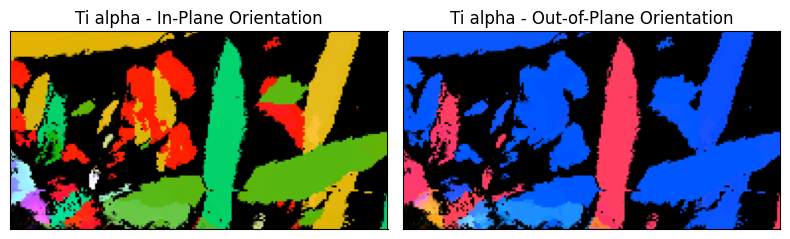

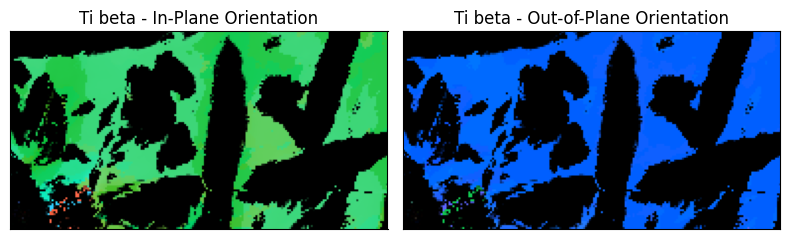

In [ ]:
p4.show(
    [
        im_alpha[:,:,:,0]*mask_alpha[:,:,None],
        im_alpha[:,:,:,1]*mask_alpha[:,:,None],
    ],
    axsize = (4,2.5),
    ticks = False,
    title = [
        'Ti alpha - In-Plane Orientation',
        'Ti alpha - Out-of-Plane Orientation',
    ],
)
p4.show(
    [
        im_beta[:,:,:,0]*mask_beta[:,:,None],
        im_beta[:,:,:,1]*mask_beta[:,:,None],
    ],
    axsize = (4,2.5),
    ticks = False,
    title = [
        'Ti beta - In-Plane Orientation',
        'Ti beta - Out-of-Plane Orientation',
    ],
)